In [5]:
#/***************************************************************/
#/* Programmer: Joan Montas                                     */
#/*                                                             */
#/* Program: Traveling Salesman/Hamiltonian Cycle               */
#/*          Solved via Genetic-Algorithm approach              */
#/*          Came up with the idea while studying biology       */
#/*          Since then I have improve and came up with         */
#/*          New and better technique                           */
#/* Approximate completion time:   35 minutes                   */
#/***************************************************************/
import numpy as np
import math
import random
import scipy
import scipy.stats as st
import matplotlib.pyplot as plt

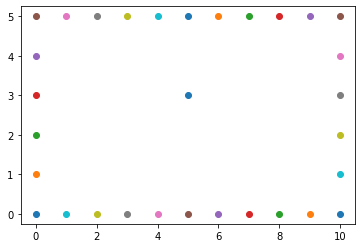

In [6]:
# mutation and number of cities

listOfCity = []
tomb = []

for i in range(0,6):
    listOfCity.append(np.array([0,i]))

for i in range(1,10):
    listOfCity.append(np.array([i,5]))
    
for i in range(5,0,-1):
    listOfCity.append(np.array([10,i]))
    
for i in range(10,0,-1):
    listOfCity.append(np.array([i,0]))

numOfCities = len(listOfCity)

for i in range(0,len(listOfCity)):
    plt.scatter(listOfCity[i][0],listOfCity[i][1])
plt.scatter(5,3)
plt.show()

In [7]:
def genesis(initPopSize,numOfCities): #numOfCities = dna length
    population  = []
    for i in range(0,initPopSize):
        #[distanceTravel,genetic]
        population.append(np.array([np.inf,np.arange(numOfCities),0]))
        np.random.shuffle(population[i][1])
    return population

#goal
fitIndividual = []
fitIndividual.append(np.array([np.inf,np.arange(numOfCities),0]))


def testPopulation(population):
    for j in range(0,len(population)):
        total = 0
        previous = (listOfCity[population[j][1][0]])
        for i in range(1,len(population[j][1])):
            current = (listOfCity[population[j][1][i]])
            total = total + (np.sqrt( ((current[0]-previous[0])**2) + ((current[1] - previous[1])**2 )))
            previous = current
            
        population[j][0] = total


def setStandard(livingPopulation):
    #we will use z score as it 
    #find mean
    mean = 0
    for i in range(0,len(livingPopulation)):
        mean = mean + livingPopulation[i][0]
    mean = mean/len(livingPopulation)
    
    #find standard deviation
    standardDeviation = 0
    for i in range(0,len(livingPopulation)):
        standardDeviation = standardDeviation + ((livingPopulation[i][0] - mean)**2)
    standardDeviation = math.sqrt(standardDeviation/len(livingPopulation))
    
    #set z score integrate background
    
    for i in range(0,len(livingPopulation)):
        livingPopulation[i][2] = 1 - st.norm.cdf((livingPopulation[i][0]-mean)/standardDeviation)


def breed(being1, being2,mutationRate):
    offSpring = np.array([np.inf,   np.full(shape = len(being1[1]),fill_value=-1),0])
    siteOfCrossOver = [random.randint(0,len(being1[1])-1),random.randint(0,len(being1[1])-1)]
    for i in range(min(siteOfCrossOver),max(siteOfCrossOver)):
        offSpring[1][i] = being1[1][i]
    for i in being2[1]:
        if i not in np.nditer(offSpring[1]):
            for j in range(0,len(being1[1])):
                if offSpring[1][j] == -1:
                    offSpring[1][j] = i
                    j = len(being1[1])
                    break
    if np.random.choice([0,1], p=[1-mutationRate,mutationRate]) == 1:
        siteOfCrossOver = [random.randint(0,len(being1[1])-1),random.randint(0,len(being1[1])-1)]
        offSpring[1][siteOfCrossOver[0]],offSpring[1][siteOfCrossOver[1]] = offSpring[1][siteOfCrossOver[1]],offSpring[1][siteOfCrossOver[0]]
        
    return offSpring


def weighted_choice_king(weights):        #favoring fitter being
    total = 0
    winner = 0
    for i, w in enumerate(weights):
        total += w
        if random.random() * total < w:
            winner = i
    return winner


def breedAndPurge(livingBeing,mutationRate,maxPop):
    newGeneration = []
    #3/4 of population breed hyperparameter NOTE
    for i in range(0,int(len(livingBeing)*3/4)):
        choice = weighted_choice_king([item[2] for item in livingBeing[i+1:]])
        offspring = breed(livingBeing[i],livingBeing[choice],mutationRate)
        newGeneration.append(offspring)
    #add new generation
    for i in range(0,len(newGeneration)):
        livingBeing.insert(0,newGeneration[i])
    #remove 1/3 of the worst hyperparameter NOTE
    for i in range(int(len(livingBeing) - len(livingBeing)*(1/3)),len(livingBeing)):
        livingBeing.pop(len(livingBeing)-1)
    #if we exceed max remove extra
    if len(livingBeing) > maxPop:
        while(len(livingBeing) > maxPop):
            livingBeing.pop(len(livingBeing)-1)

            
def newGeneration(livingBeing,mutationRate,maxPop,fittestOfEachRecord):
    testPopulation(livingBeing)
    setStandard(livingBeing)
    livingBeing.sort(key=lambda x: x[0], reverse = False)
    fittestOfEachRecord.append(livingBeing[0][0])
    breedAndPurge(livingBeing,mutationRate,maxPop)
    testPopulation(livingBeing)
    setStandard(livingBeing)
    livingBeing.sort(key=lambda x: x[0], reverse = False)


<ipython-input-7-bf206264b4ff>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  fitIndividual.append(np.array([np.inf,np.arange(numOfCities),0]))


<ipython-input-7-bf206264b4ff>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  population.append(np.array([np.inf,np.arange(numOfCities),0]))
<ipython-input-7-bf206264b4ff>:47: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  offSpring = np.array([np.inf,   np.full(shape = len(being1[1]),fill_value=-1),0])


41.3851648071345


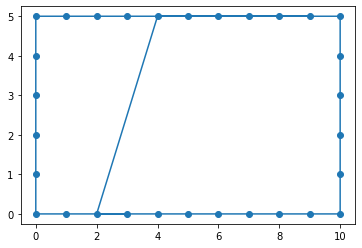

In [8]:
fittestOfEachRecord = []

initPopSize = 33      #33
livingBeing =  genesis(initPopSize=initPopSize,numOfCities=numOfCities)

mutationRate = 0.3   #0.3

maxPopulation = 100  #100
     
generations = 200  #200
for i in range(0,generations):
    newGeneration(livingBeing,mutationRate,maxPopulation,fittestOfEachRecord)
    


testPopulation(livingBeing)
print(livingBeing[0][0])
x = []
y = []

for i in range(0,numOfCities):
    x.append(listOfCity[livingBeing[0][1][i]][0])
    y.append(listOfCity[livingBeing[0][1][i]][1])
plt.plot(x,y,"-o")
plt.show()



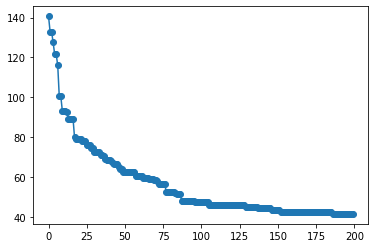

In [9]:
x=[]
for i in range(0,len(fittestOfEachRecord)):
    x.append(i)

plt.plot(x,fittestOfEachRecord,"-o")
plt.show()
#descent graph of minimizing loss function